<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

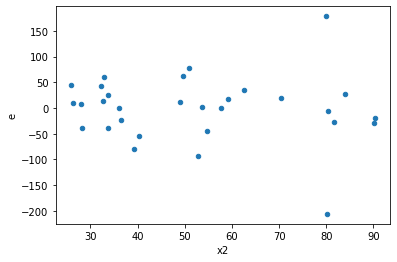

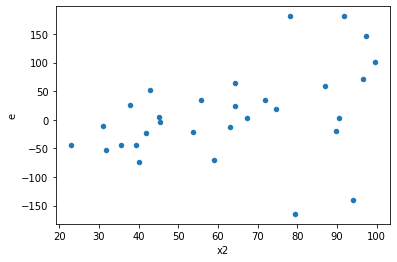

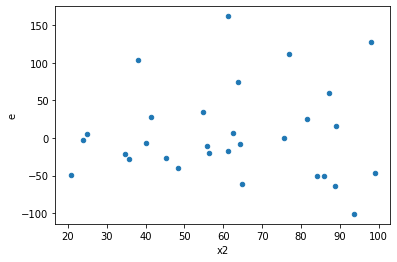

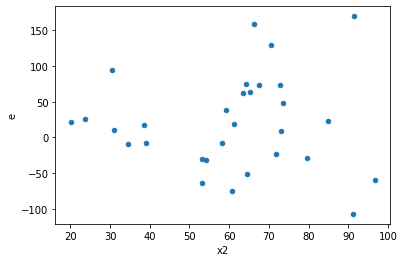

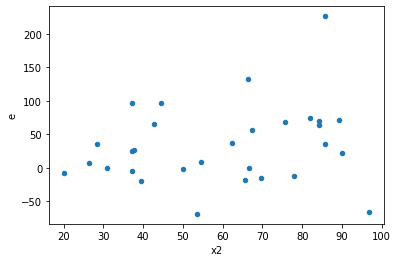

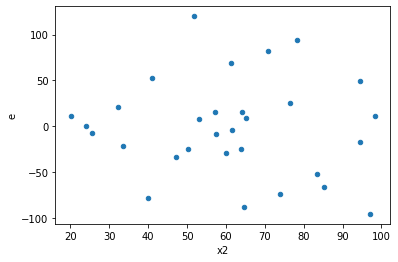

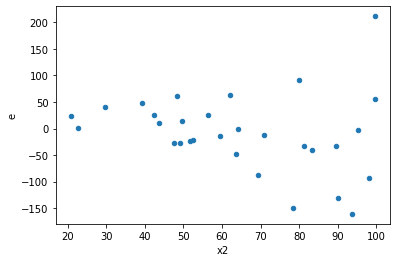

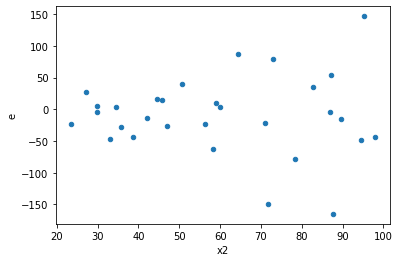

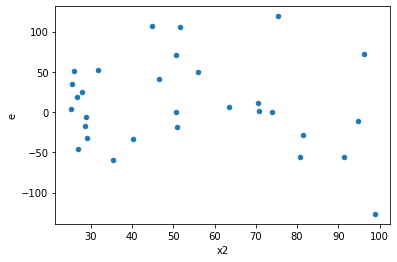

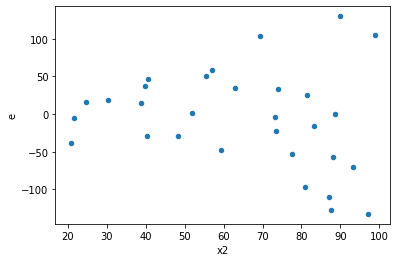

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,12.0,12.0,47666.58975979887,57062.57050036562,3972.2158133165726,4755.214208363802,1.1971187951123607,0.760360233809207,0.6198198830953965,0.3801801169046035,Reject005=1 : Homoscedasticity
6.0,13.0,11.0,44963.45302045863,73700.0212284822,3458.727155419895,6700.001929862018,1.9371293625641965,0.2792455376562324,0.8603772311718838,0.1396227688281162,Reject005=1 : Homoscedasticity
10.0,8.0,16.0,23568.78256778611,51946.10399375636,2946.097820973264,3246.6314996097726,1.1020107603002895,0.8221038947145778,0.5889480526427111,0.4110519473572889,Reject005=1 : Homoscedasticity
11.0,18.0,6.0,23902.17662750511,112013.97046630345,1327.8987015280616,18668.99507771724,14.059050631071592,0.003565548519079753,0.9982172257404601,0.0017827742595398766,Reject005=0 : Heteroscedasticity
12.0,14.0,10.0,18161.904734023494,52727.458918275,1297.2789095731066,5272.7458918275,4.064465900831297,0.03131284647225252,0.9843435767638737,0.01565642323612626,Reject005=0 : Heteroscedasticity
14.0,16.0,8.0,26599.61078737776,59588.32865174405,1662.47567421111,7448.541081468006,4.480391019858105,0.03756885611536065,0.9812155719423197,0.018784428057680325,Reject005=0 : Heteroscedasticity
16.0,11.0,13.0,23760.95314101402,99599.97435151335,2160.0866491830925,7661.53648857795,3.5468653498115046,0.03348061139538783,0.9832596943023061,0.016740305697693914,Reject005=0 : Heteroscedasticity
18.0,10.0,14.0,23133.22362885209,35965.75406509364,2313.3223628852093,2568.9824332209746,1.110516404647082,0.834714534104058,0.582642732947971,0.417357267052029,Reject005=1 : Homoscedasticity
19.0,9.0,15.0,26430.597624241404,60835.26162296607,2936.733069360156,4055.684108197738,1.3810189800741322,0.5577108423464237,0.7211445788267882,0.2788554211732118,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,14.0,65000.29877447135,52553.53969675739,6500.029877447135,3753.8242640540993,0.5775087707025127,0.38623431708053885,Reject005=1 : Homoscedasticity
1.0,20.0,4.0,66753.93137725115,2046.1039054033952,3337.696568862558,511.5259763508488,0.15325718374848257,0.003147072662403723,Reject005=0 : Heteroscedasticity
2.0,7.0,17.0,38663.92760533823,73341.19081410674,5523.418229334033,4314.187694947455,0.781072067299822,0.7761427986385051,Reject005=1 : Homoscedasticity
3.0,11.0,13.0,54930.958712356805,20926.859132851907,4993.723519305164,1609.7583948347622,0.32235633162541344,0.0681109665030859,Reject005=1 : Homoscedasticity
4.0,12.0,12.0,47666.58975979887,57062.57050036562,3972.2158133165726,4755.214208363802,1.1971187951123607,0.760360233809207,Reject005=1 : Homoscedasticity
5.0,16.0,8.0,43188.24672981769,6551.876029948828,2699.265420613606,818.9845037436035,0.3034101416960431,0.04042174319516204,Reject005=0 : Heteroscedasticity
6.0,13.0,11.0,44963.45302045863,73700.0212284822,3458.727155419895,6700.001929862018,1.9371293625641965,0.2792455376562324,Reject005=1 : Homoscedasticity
7.0,16.0,8.0,91952.68596470157,9419.386251521712,5747.042872793848,1177.423281440214,0.20487462987514227,0.00688832490981786,Reject005=0 : Heteroscedasticity
8.0,14.0,10.0,68838.09846449546,13464.953998709761,4917.007033178247,1346.4953998709761,0.2738445137021963,0.027561218259349124,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      732
Reject005=0 : Heteroscedasticity    268
Name: Result_test, dtype: int64